## A1>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
from tqdm import tqdm
from ast import literal_eval
import copy
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

## A2>

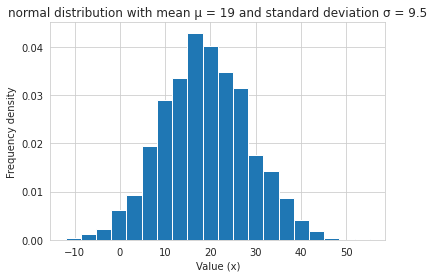

In [2]:
p = 19
mu_orig = p
sigma_orig = p/2
data = mu_orig + np.random.randn(2000)*sigma_orig
mu_obs = np.mean(data)
plt.hist(data, density = True, bins = 20)
plt.xlabel("Value (x)")
plt.ylabel("Frequency density")
plt.title(f"normal distribution with mean µ = {p} and standard deviation σ = {p/2}")
plt.show()

## A- 3,4,5>

In [3]:
def prior(theta):
    sigma = theta[1]
    if sigma > 0:
        return 1
    else:
        return 0

def transition_model(theta): 
    return [theta[0], np.random.normal(theta[1], 1)]

## A--5>

Answer: Logarithm is helpful because -

The logarithm of the probability of multiple joint probabilities simplifies to the sum of the logarithms of the individual probabilities (and the sum rule is easier than the product rule for differentiation).  log(∏iP(xi))=∑ilog(P(xi)) 

The logarithmic form is more numerically stable.

Logarithm is a monotonic transformation that preserves the locations of the extrema (in particular, the estimated parameters in max-likelihood are identical for the original and the log-transformed formulation)


In [4]:
def log_likelihood(data, mu, sigma):
    constant = 1/np.sqrt(2*math.pi*(sigma**2))
    L = 0
    for i in range(len(data)):        
        variable = np.exp(-(data[i] - mu)**2/(2*(sigma**2)))
        L += np.log(constant*variable)
    return L

## A--6,7>

In [5]:
def acceptance(theta_current, theta_new):
    L_new = log_likelihood(data, mu_obs, theta_new[1])
    L_current = log_likelihood(data, mu_obs, theta_current[1])
    prior_new = prior(theta_new)
    prior_current = prior(theta_current)
    numerator = L_new + np.log(prior_new)
    denominator = L_current + np.log(prior_current)
    alpha = min(1, np.exp(numerator-denominator))
    unif = np.random.rand(1,1)
    if alpha > unif:
        return True
    else: 
        return False

In [6]:
def metropolis(initial_param, iters):
    sigma = {}
    x = initial_param
    for i in range(iters):
        x_next = transition_model(x)
        if acceptance(x, x_next):
            x = x_next
            sigma[i] = ['accepted', x_next[1]]
        else:
            sigma[i] = ['rejected', x_next[1]]
    return sigma

In [7]:
initial_theta = [p, 0.1]
iters = 50000
all_sigma = metropolis(initial_theta, iters)

In [8]:
accepted = []
rejected = [] 
accept_iter = []
reject_iter = []

In [9]:
for i in range(iters):
    if all_sigma[i][0] == 'accepted':
        accepted.append(all_sigma[i][1])
        accept_iter.append(i)
    else:
        rejected.append(all_sigma[i][1])
        reject_iter.append(i)
    if i == 500:
      accept_iter_len = len(accept_iter)
      reject_iter_len = len(reject_iter)

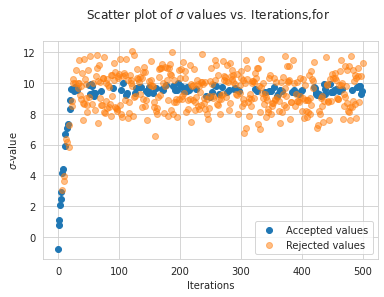

In [10]:
plt.scatter(accept_iter[:accept_iter_len], accepted[:accept_iter_len], label = "Accepted values", alpha = 1)
plt.scatter(reject_iter[:reject_iter_len], rejected[:reject_iter_len], label = "Rejected values", alpha = 0.5)
plt.ylabel("$\sigma$-value")
plt.xlabel("Iterations")
plt.title("Scatter plot of $\sigma$ values vs. Iterations,for  \n")
plt.legend()
plt.show()

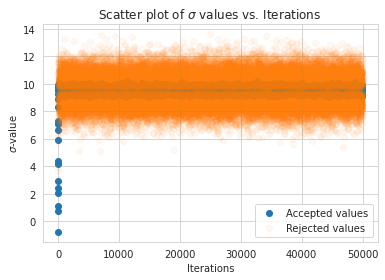

In [11]:

plt.scatter(accept_iter, accepted, label = "Accepted values", alpha = 1)
plt.scatter(reject_iter, rejected, label = "Rejected values", alpha = 0.05)
plt.ylabel("$\sigma$-value")
plt.xlabel("Iterations")
plt.title("Scatter plot of $\sigma$ values vs. Iterations ")
plt.legend()
plt.show()

# Comments 
From the plot for the first 200 iterations, we observe that the initial accepted  σ -values are far away from the original  σ -value  (=3) , and after that, the accepted values tend towards 3 and varies within a small range.


Number of rejected  σ  values is much higher than the number of accepted  σ  values.


## A8>

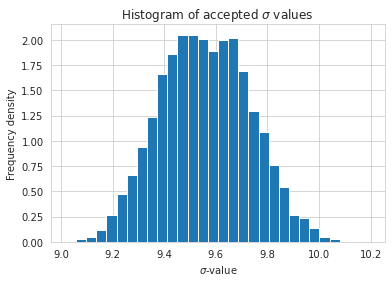

In [12]:
plt.hist(accepted[int(len(accepted)*0.25):], density = True, bins = 30)
plt.xlabel("$\sigma$-value")
plt.ylabel("Frequency density")
plt.title("Histogram of accepted $\sigma$ values ")
plt.show()

## [Comments>

1> From the histogram, we see that the peak is at 3, which is the original  σ -value.

2>The y-axis contains frequency density

3>We reject the initial 25% of the values since in the initial iterations, different values of  σ  which are far away from the original value are being accepted. As the iterations progress, the posterior keeps changing and algorithm learns to accept the correct  σ -values better.

## A 9,10>

In [13]:
def prior_new(theta):
    sigma = theta[1]
    if sigma > 0:
        return 1*0.1
    else:
        return 0

def transition_model_new(theta): 
    return (np.random.multivariate_normal(theta, np.identity(len(theta))))


def acceptance_new(theta_current, theta_new):
    L_new = log_likelihood(data, theta_new[0], theta_new[1])
    L_current = log_likelihood(data, theta_current[0], theta_current[1])
    prior_new1 = prior_new(theta_new)
    prior_current1 = prior_new(theta_current)
    numerator = L_new + np.log(prior_new1)
    denominator = L_current + np.log(prior_current1)
    alpha = min(1, np.exp(numerator-denominator))
    unif = np.random.rand(1,1)
    if alpha > unif:
        return True
    else: 
        return False

def metropolis_new(initial_param, iters):
    sigma = {}
    x = initial_param
    for i in range(iters):
        x_next = transition_model_new(x)
        if acceptance_new(x, x_next):
            x = x_next
            sigma[i] = ['accepted', x_next]
        else:
            sigma[i] = ['rejected', x_next]
    return sigma

In [14]:
initial_theta_new = [p/2, 0.1]
iters = 25000
all_sigma_new = metropolis_new(initial_theta_new, iters)

In [15]:
accepted_new = []
accepted_mu = []
for i in range(iters):
    if all_sigma_new[i][0] == 'accepted':
        accepted_new.append(all_sigma_new[i][1][1])
        accepted_mu.append(all_sigma_new[i][1][0])

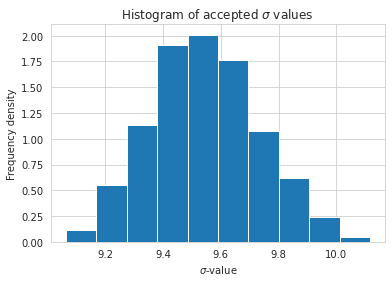

In [16]:
plt.hist(accepted_new[int(len(accepted_new)*0.25):], density = True)
plt.xlabel("$\sigma$-value")
plt.ylabel("Frequency density")
plt.title("Histogram of accepted $\sigma$ values ")
plt.show()

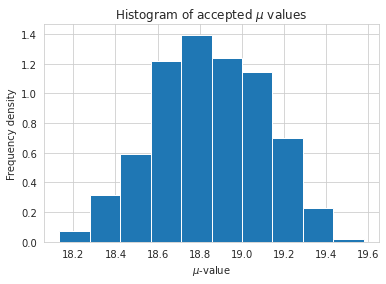

In [17]:
plt.hist(accepted_mu[int(len(accepted_mu)*0.25):], density = True)
plt.xlabel("$\mu$-value")
plt.ylabel("Frequency density")
plt.title("Histogram of accepted $\mu$ values ")
plt.show()

# Comments>
1>We observe from the histogram of  σ  that the  σ -values are centered around 3, which is the original  σ  value.


2>We observe from the histogram of  μ  that the  μ -values are centered around 10, which is the original  μ -value.
